#                                                 DECISION TREE

-------------------------------------------------------------------------------------------------------------

LIBRARY

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,  confusion_matrix,  precision_score,  recall_score,  classification_report
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

IMPORT DATA MENGGUNAKAN PANDAS

In [128]:
test_case = pd.read_csv("test.csv")
train_case = pd.read_csv("train.csv")
dataset = train_case
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

VARIABEL FITUR DAN TARGET DARI DATA

In [129]:
feature_columns = dataset.drop(columns=['price_range'])
target_column = dataset['price_range']
feature_columns

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


TRAIN TEST SPLIT DATA

In [130]:
from sklearn.model_selection import train_test_split
X = feature_columns
y = target_column
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1800 200 1800 200


OPTIMALISASI DENGAN PRUNING

In [131]:
unoptimized_clf = DecisionTreeClassifier()

# Cari nilai ccp_alpha yang optimal
alphas = np.arange(0.0, 0.2, 0.01)  # Atur rentang nilai ccp_alpha
mean_scores = []

for alpha in alphas:
    unoptimized_clf.set_params(ccp_alpha=alpha)
    scores = cross_val_score(unoptimized_clf, X_train, y_train, cv=5, scoring='accuracy')  # Ganti dengan metrik yang diinginkan
    mean_scores.append(scores.mean())

# Temukan nilai ccp_alpha yang memberikan kinerja terbaik
optimal_alpha = alphas[np.argmax(mean_scores)]
print(f'Optimal ccp_alpha: {optimal_alpha}')

Optimal ccp_alpha: 0.0


DECISION TREE CLASSIFIER DENGAN DATA TRAIN SPLIT

In [132]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, max_features=None ,ccp_alpha=optimal_alpha)
clf = clf.fit(X_train, y_train)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1800 200 1800 200


DECISION TREE CLASSIFIER TANPA DATA TRAIN SPLIT

In [133]:
full_clf = DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=5, max_features=None ,ccp_alpha=optimal_alpha )
full_clf = full_clf.fit(feature_columns, target_column) 

1 ROW DATA

In [134]:
feature_row_index = np.array(feature_columns)
feature_row_data = feature_row_index[0].reshape(1, -1)

target_row_index = np.array(target_column)
target_row_data = target_row_index[0].reshape(1, -1)

# Membuat dan melatih model
single_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4, ccp_alpha=optimal_alpha)
single_clf = single_clf.fit(feature_row_data, target_row_data)

In [135]:
test_single_model = single_clf.predict(feature_row_data)
test_single_model

array([1], dtype=int64)

PREDICTIONS

In [136]:
predictions = clf.predict(X_test)
predictions

array([2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 3, 1, 2, 1, 1, 3, 3, 1, 3, 0,
       1, 2, 2, 3, 0, 3, 3, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 3, 1, 0, 1, 0,
       1, 0, 3, 3, 0, 2, 3, 0, 1, 2, 2, 1, 3, 0, 0, 3, 1, 2, 2, 3, 2, 2,
       0, 2, 1, 2, 0, 2, 3, 2, 3, 0, 2, 0, 3, 0, 1, 3, 1, 2, 0, 0, 1, 0,
       3, 2, 3, 1, 3, 3, 0, 1, 2, 2, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 3, 2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 1, 0, 3, 0, 3, 2, 0, 2,
       2, 3, 3, 1, 3, 0, 2, 0, 0, 1, 3, 0, 2, 3, 1, 1, 0, 2, 2, 0, 1, 3,
       1, 0, 2, 3, 0, 1, 2, 3, 1, 2, 2, 0, 3, 0, 2, 0, 2, 3, 0, 3, 1, 0,
       2, 1, 2, 3, 1, 1, 0, 0, 0, 2, 0, 0, 3, 2, 3, 3, 0, 2, 2, 1, 2, 1,
       1, 0], dtype=int64)

FULL/RAW PREDICTION

In [137]:
full_predictions = full_clf.predict(feature_columns)
full_predictions

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

METRICS VALIDATION

In [138]:
accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions, labels=[0,1])
precision_score(y_test, predictions, average='weighted')
recall_score(y_test, predictions, average='weighted')
print(classification_report(y_test, predictions, target_names=['accuracy_score', 'confusion_matrix', 'precision_score', 'recall_score']))

                  precision    recall  f1-score   support

  accuracy_score       0.89      0.89      0.89        53
confusion_matrix       0.75      0.78      0.77        46
 precision_score       0.78      0.78      0.78        54
    recall_score       0.87      0.83      0.85        47

        accuracy                           0.82       200
       macro avg       0.82      0.82      0.82       200
    weighted avg       0.82      0.82      0.82       200



FULL METRICS VALIDATION

In [139]:
accuracy_score(target_column, full_predictions)
confusion_matrix(target_column, full_predictions, labels=[0,1])
precision_score(target_column, full_predictions, average='weighted')
recall_score(target_column, full_predictions, average='weighted')
print(classification_report(target_column, full_predictions, target_names=['accuracy_score', 'confusion_matrix', 'precision_score', 'recall_score']))

                  precision    recall  f1-score   support

  accuracy_score       0.96      0.92      0.94       500
confusion_matrix       0.82      0.89      0.85       500
 precision_score       0.84      0.77      0.81       500
    recall_score       0.89      0.93      0.91       500

        accuracy                           0.88      2000
       macro avg       0.88      0.88      0.88      2000
    weighted avg       0.88      0.88      0.88      2000



FEATURE IMPORTANCE PLOT

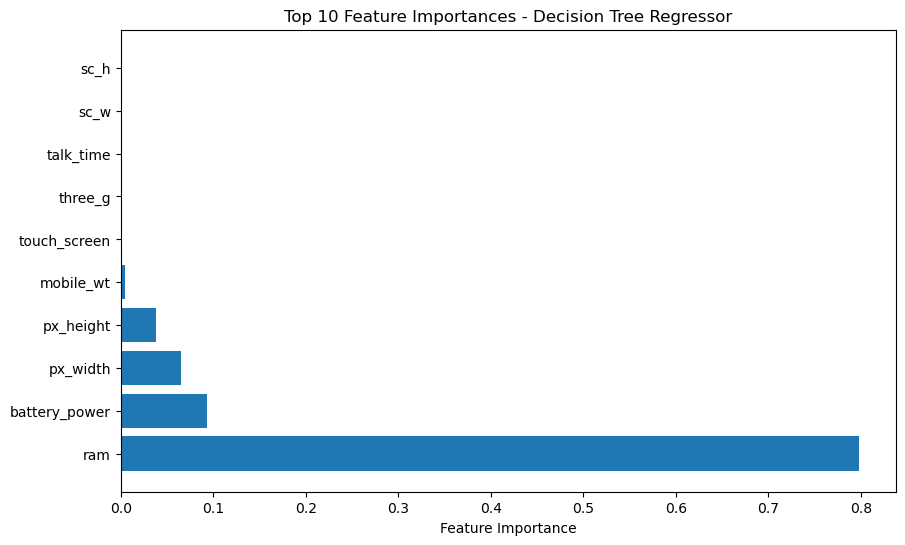

In [140]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)

from matplotlib import pyplot as plt
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance.index[:top_n])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree Regressor')
plt.show()

VISUALIZATION

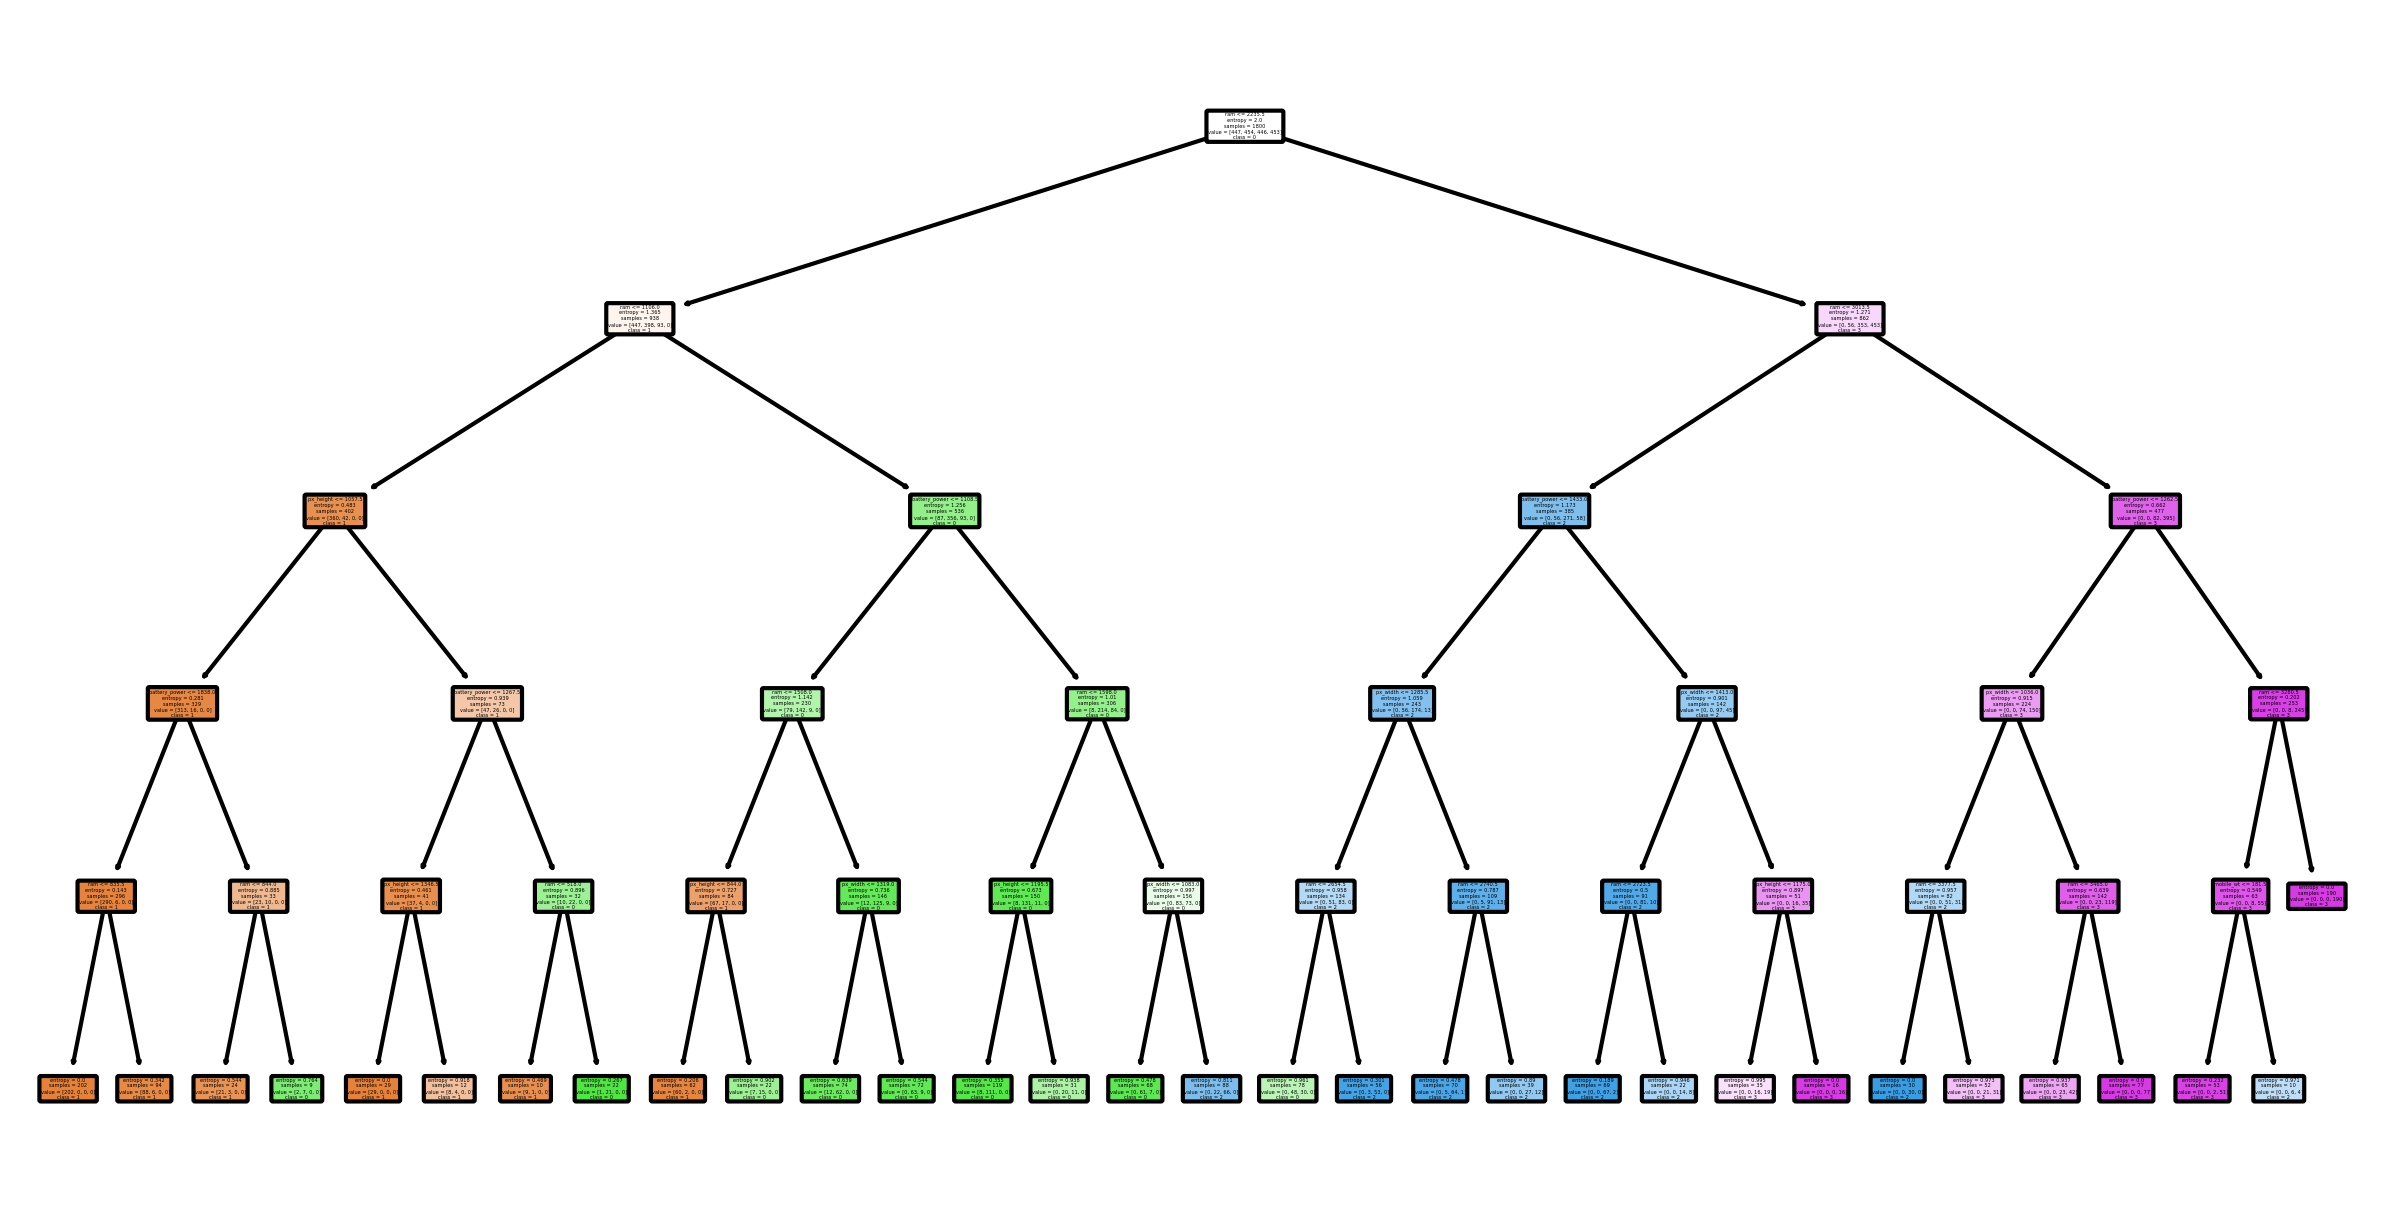

In [147]:
fn = X_train.columns.tolist()
cn =  [str(i) for i in y_train.unique()]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True, rounded=True, ax=axes)
plt.show()

FULL/RAW DATA VISUALIZATION

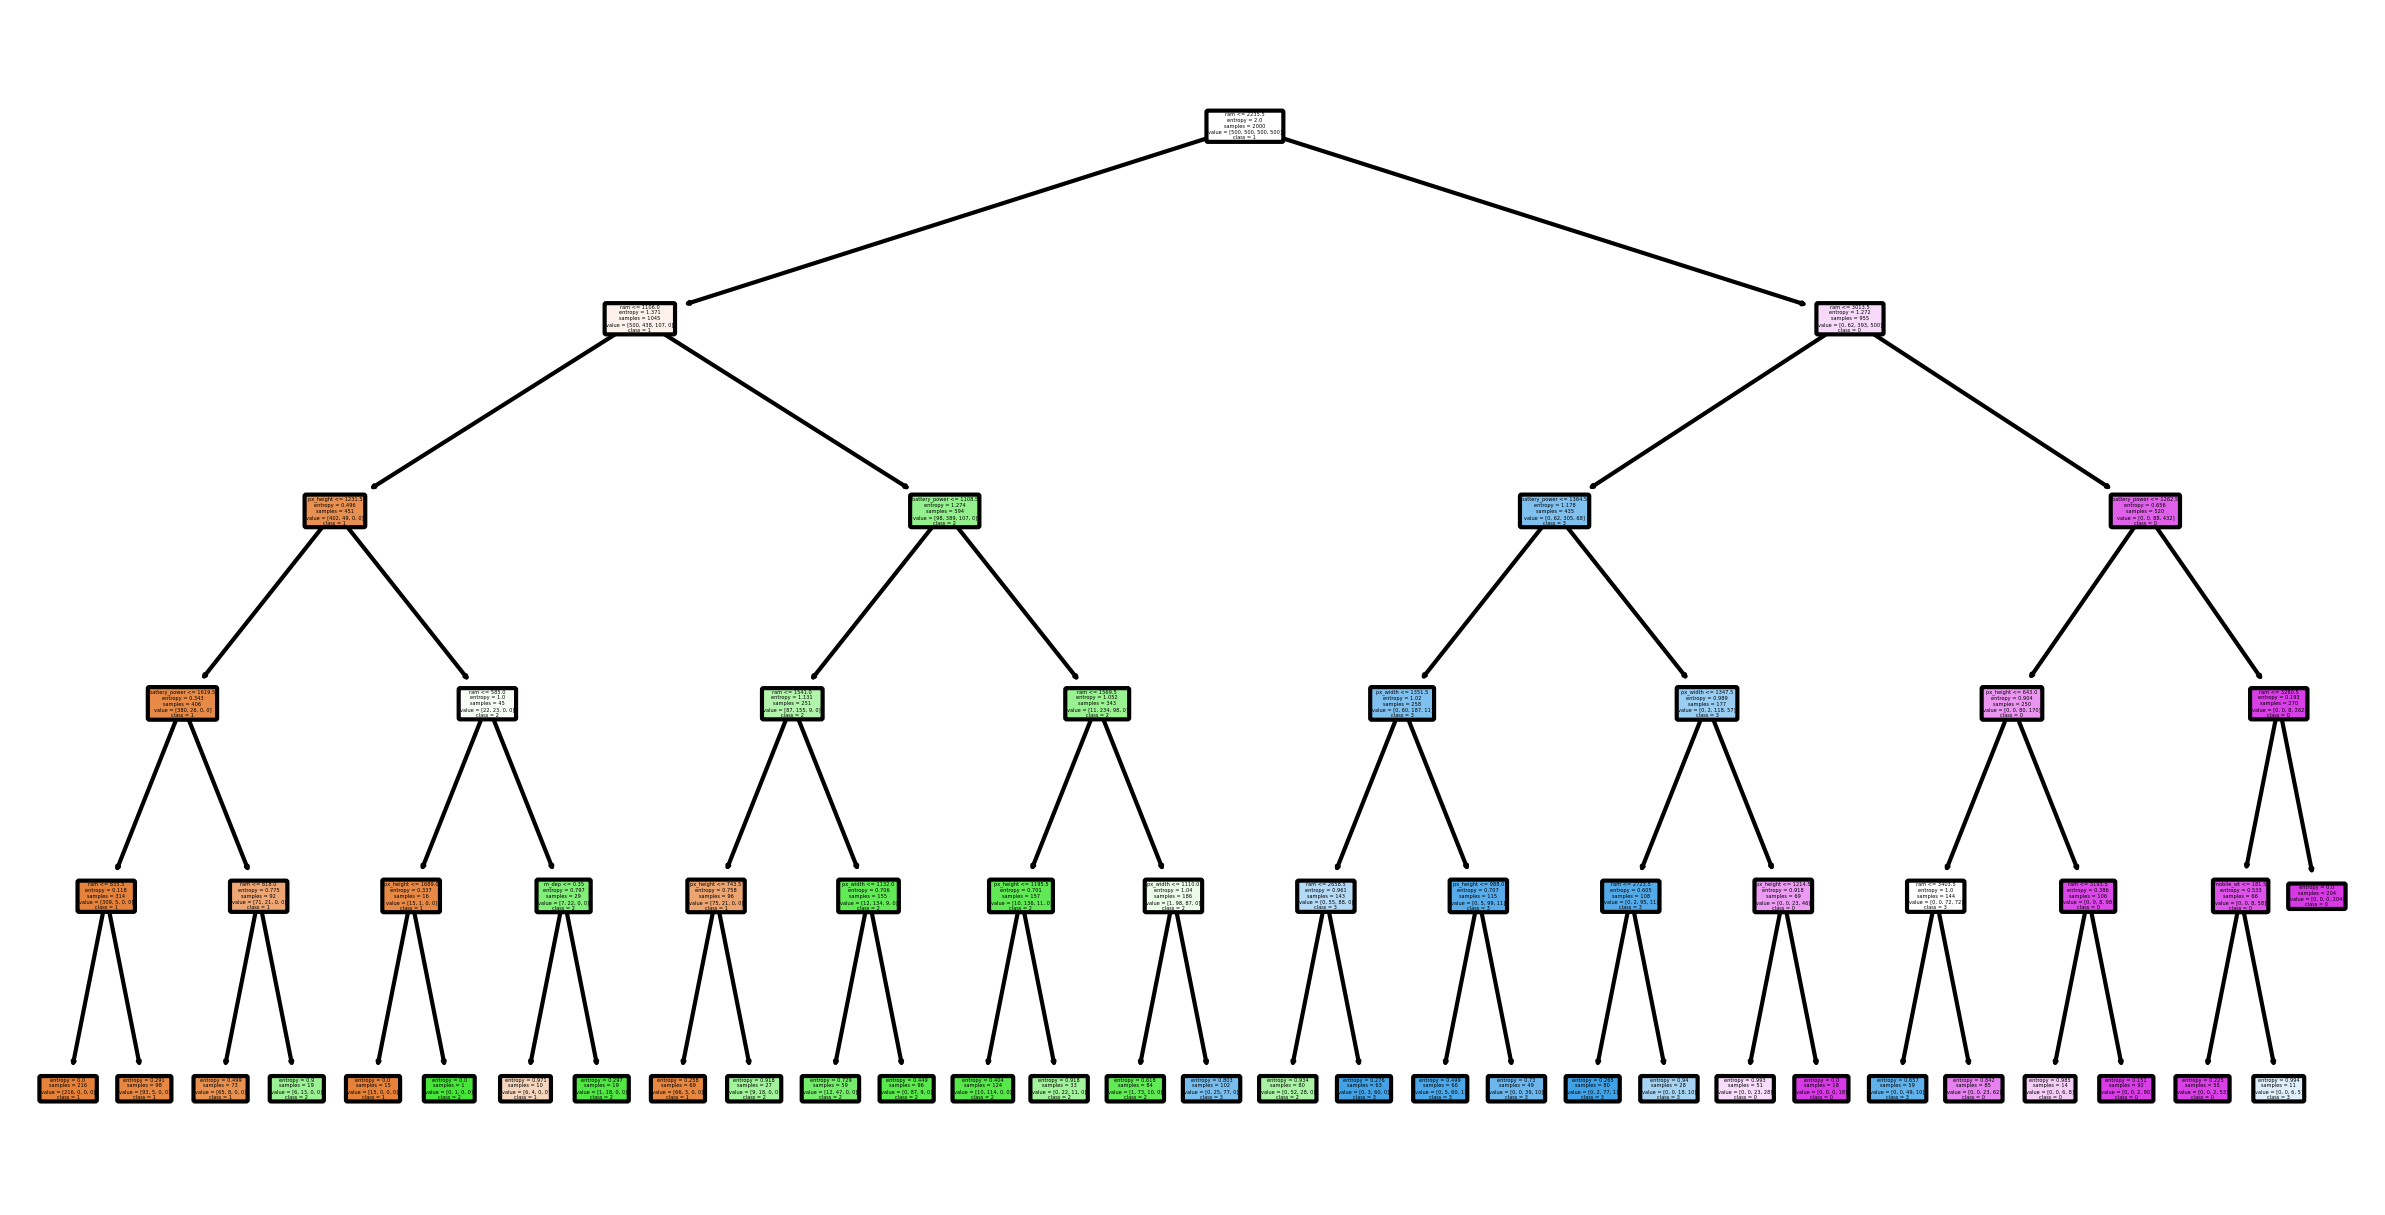

In [142]:
fn = feature_columns.columns.tolist()
cn =  [str(i) for i in dataset['price_range'].unique()]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=300)
plot_tree(full_clf, feature_names=fn, class_names=cn, filled=True, rounded=True, ax=axes)
plt.show()

SINGLE ROW DATA VISUALIZATION

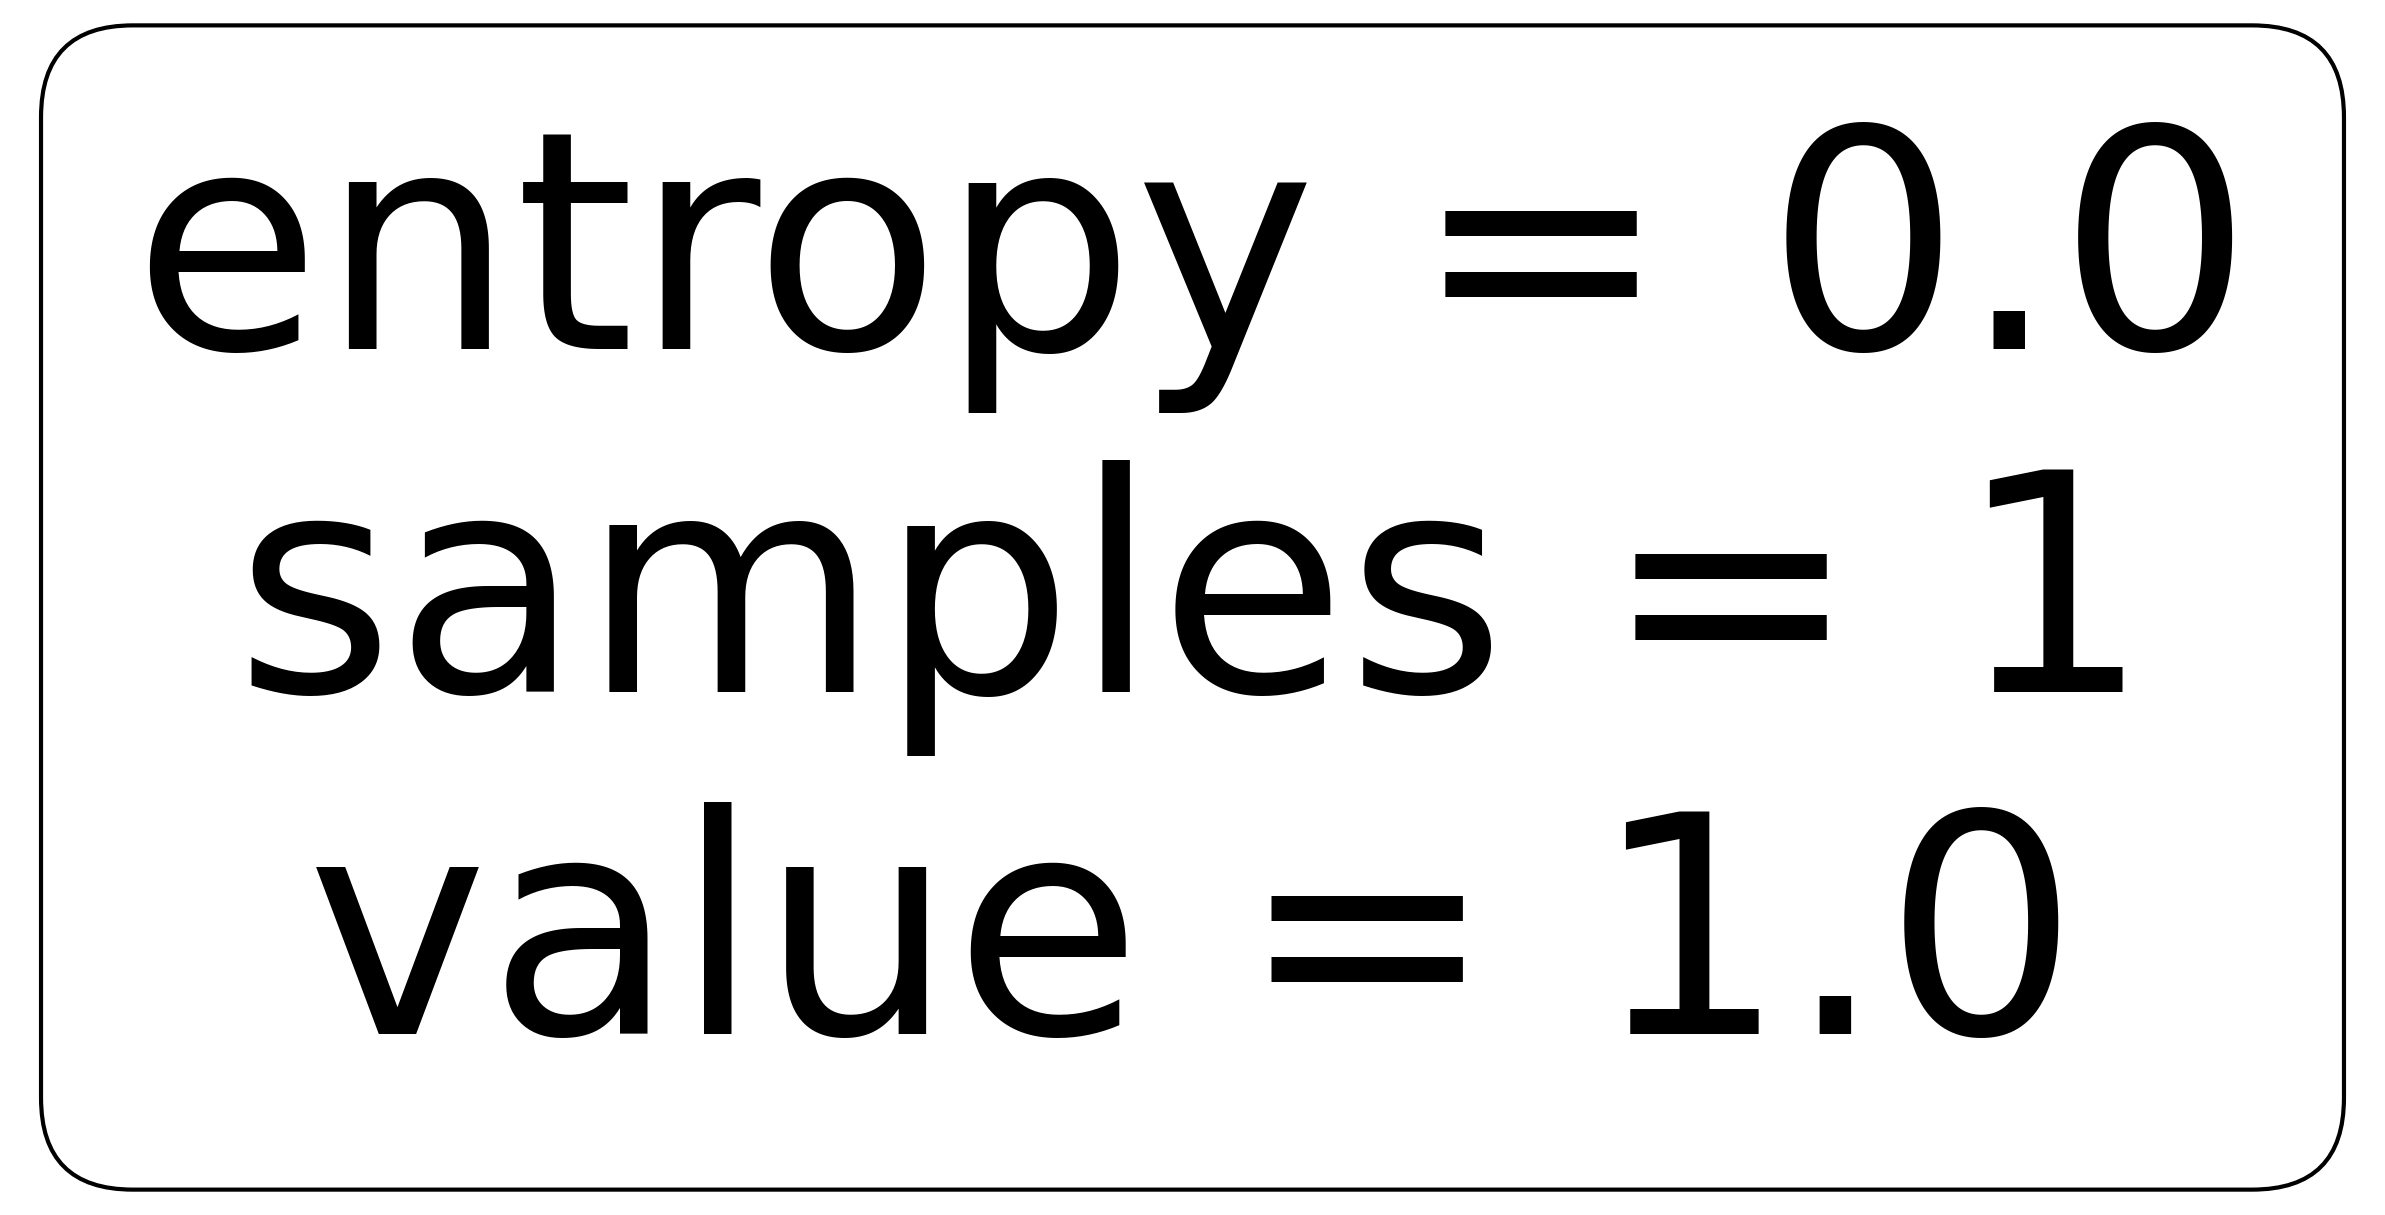

In [152]:
fn = feature_row_index.tolist()
cn =  [str(i) for i in target_row_index.tolist()]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=300)
plot_tree(single_clf, feature_names=fn, class_names=cn, filled=True, rounded=True, ax=axes)
plt.show()

# K-FOLD

In [144]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8425 0.8175 0.8325 0.8175 0.8125]
Average CV Score:  0.8245000000000001
Number of CV Scores used in Average:  5


# FULL K-FOLD

In [145]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(full_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8425 0.8175 0.8325 0.8175 0.8125]
Average CV Score:  0.8245000000000001
Number of CV Scores used in Average:  5


# SINGLE K-FOLD

In [146]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(single_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.815  0.7775 0.8075 0.755  0.775 ]
Average CV Score:  0.7859999999999999
Number of CV Scores used in Average:  5
